# 3. Descriptive Statistics


### General Descriptive Satistics


This section is about exploring object types, there change and summary statisctics


### Import Libraries


In [25]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import matplotlib.pyplot as plt

### Reading data


Reading the result from the previois section


In [26]:
lines_gdf_stat = gpd.read_file('data/2_lines_gdf_stat.gpkg')

#### 0. Object Types


Let's look at the destribution of objects based on type


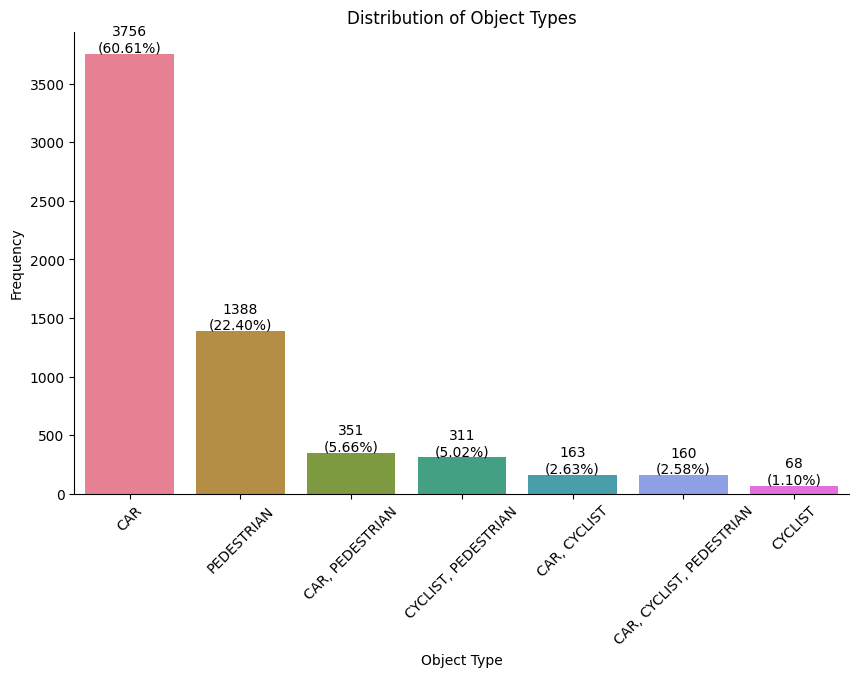

In [27]:
# Function to standardize each string by sorting the items
def standardize_string(s):
    items = s.split(', ')
    sorted_items = sorted(items)
    return ', '.join(sorted_items)

# Apply the function to the 'unique_object_types' column
lines_gdf_stat['unique_object_types_sorted'] = lines_gdf_stat['unique_object_types'].apply(standardize_string)

# Calculate counts and sort values by frequency in descending order
counts = lines_gdf_stat['unique_object_types_sorted'].value_counts().sort_values(ascending=False)

# Create a palette of different colors
palette = sns.color_palette("husl", len(counts))

# Plot the histogram with sorted values and different colors for each bin
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette=palette)

# Calculate the total number of observations
total = len(lines_gdf_stat)

# Annotate each bar with the count and percentage
for p, count in zip(ax.patches, counts):
    height = p.get_height()
    percentage = f'{height / total * 100:.2f}%'
    ax.annotate(f'{int(height)}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Remove the plot frame (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set title and labels
plt.title('Distribution of Object Types')
plt.xlabel('Object Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

This graph is different from the one in the first chapter as it looks at object types not for individual points but for the objects as a whole, also considering changes in object type.

We can see that more than 60% of the objects are cars, around 22.4% are pedestrians, and only 1% are two-wheelers. The remaining 17% are objects that changed their type along the route for some reason. We will explore these categories in the following section.


#### Exploring Data with TypeChanges


We are exploring the objects that were changing their type along the route and dividing them into 3 classes based on the share of the main type: less than 80%, between 80% and 90%, and between 90% and 100%


In [28]:
# Create the 'typeChanges' field
lines_gdf_stat['typeChanges'] = lines_gdf_stat['top_object_type_percentage'].apply(lambda x: 1 if x < 100 else 0)

# Create the 'typeChangesRate' field
def calculate_type_changes_rate(percentage):
    if percentage == 100:
        return 0
    elif 90 <= percentage < 100:
        return 0.1
    elif 80 <= percentage < 90:
        return 0.2
    else:
        return 1

lines_gdf_stat['typeChangesRate'] = lines_gdf_stat['top_object_type_percentage'].apply(calculate_type_changes_rate)

# Display the DataFrame with the new fields
lines_gdf_stat.head()

,object_id,total_time,avg_heading,avg_v,avg_width,avg_length,avg_height,object_type,time_class,avg_heading_change,...,CYCLIST,PEDESTRIAN,top_object_type_percentage,route_length,total_time_s,direct_real_d_ratio,geometry,unique_object_types_sorted,typeChanges,typeChangesRate
0,152997118,286302,133.7800,0.03,1.869,4.3870,1.151,CAR,0,0.065886,...,0,0,100.0,102.985753,286.302,623.585910,"LINESTRING (13.06440 47.81014, 13.06441 47.810...",CAR,0,0.0
1,152997181,138700,148.0520,0.77,0.559,0.5585,1.332,PEDESTRIAN,0,-0.048435,...,0,1342,100.0,110.534391,138.700,1.684016,"LINESTRING (13.06399 47.81006, 13.06399 47.810...",PEDESTRIAN,0,0.0
2,152997182,270701,139.9335,0.02,1.912,4.5230,1.690,CAR,0,-0.068684,...,0,0,100.0,60.296137,270.701,698.199732,"LINESTRING (13.06413 47.81005, 13.06413 47.810...",CAR,0,0.0
3,152997183,101799,105.4660,0.01,1.872,4.8670,1.566,CAR,0,-0.081633,...,0,0,100.0,144.550702,101.799,1.208331,"LINESTRING (13.06339 47.80977, 13.06339 47.809...",CAR,0,0.0
4,152997184,100897,97.4585,0.01,1.974,5.0000,1.615,CAR,0,-0.053851,...,0,0,100.0,144.484505,100.897,1.299410,"LINESTRING (13.06339 47.80978, 13.06340 47.809...",CAR,0,0.0


Filtering Data that has typeChanges along the route


In [29]:
lines_type_changes = lines_gdf_stat[lines_gdf_stat['typeChanges']>0]

Creating histogram to explore the distribution of objects based on the share of the main object


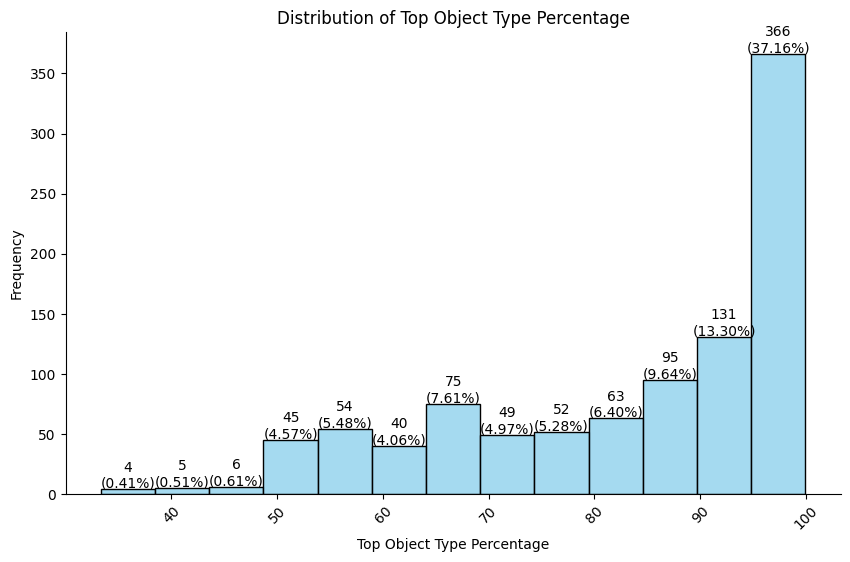

In [30]:
# Plot the histogram with a custom color
plt.figure(figsize=(10, 6))
ax = sns.histplot(lines_type_changes['top_object_type_percentage'], kde=False, color='skyblue')

# Calculate the total number of observations
total = len(lines_type_changes)

# Annotate each bar with the count and percentage
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total * 100:.2f}%'
    ax.annotate(f'{int(height)}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Remove the plot frame (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set title and labels
plt.title('Distribution of Top Object Type Percentage')
plt.xlabel('Top Object Type Percentage')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

For the same task creating Stacked Bar Chart, to see it from different perspective


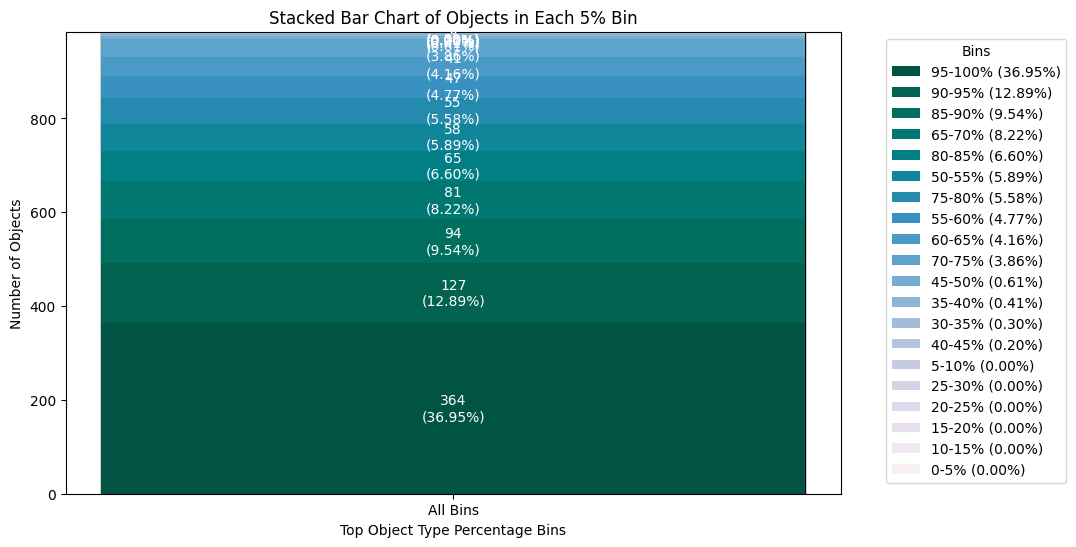

In [31]:
# Assume lines_gdf_stat is your DataFrame and it has the column 'top_object_type_percentage'

# Create bins with 5% width
bins = np.arange(0, 105, 5)  # Create bins from 0 to 100 with step 5
labels = [f'{i}-{i+5}%' for i in range(0, 100, 5)]

# Bin the data
lines_gdf_stat['bins'] = pd.cut(lines_gdf_stat['top_object_type_percentage'], bins=bins, labels=labels, right=False)

# Count the number of objects in each bin
bin_counts = lines_gdf_stat['bins'].value_counts().sort_index()

# Sort the bin counts in descending order for the legend
sorted_bin_counts = bin_counts.sort_values(ascending=False)

# Calculate the total number of objects
total = bin_counts.sum()

# Prepare the data for the stacked bar plot
bin_labels = sorted_bin_counts.index
counts = sorted_bin_counts.values
percentages = (counts / total) * 100

# Create an inverted gradient color palette
cmap = sns.color_palette("PuBuGn", len(counts))[::-1]

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(['All Bins'], [sum(counts)], color='white', edgecolor='black', linewidth=1)

# Add stacked sections with gradient colors
bottom = 0
for count, percentage, label, color in zip(counts, percentages, bin_labels, cmap):
    plt.bar(['All Bins'], [count], bottom=bottom, label=f'{label} ({percentage:.2f}%)', color=color)
    bottom += count

# Annotate each section with white text
bottom = 0
for count, percentage in zip(counts, percentages):
    plt.text(0, bottom + count / 2, f'{count}\n({percentage:.2f}%)', ha='center', va='center', fontsize=10, color='white')
    bottom += count


# Remove the plot frame (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set title and labels
plt.title('Stacked Bar Chart of Objects in Each 5% Bin')
plt.xlabel('Top Object Type Percentage Bins')
plt.ylabel('Number of Objects')
plt.legend(title='Bins', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


More than 36% of objects that change their type, actually doesn't change it too much and 90%+ of all points are considered as one type. 12% more have more than 90% of points with the same type.

This data help us to extract data that chages its type a lot and will be hard to analyse. We won't filter initial data based on this variable but we will consider it as one of the parameters for data quality assesment


Let's explore how the object types were changing (order of transition between types):


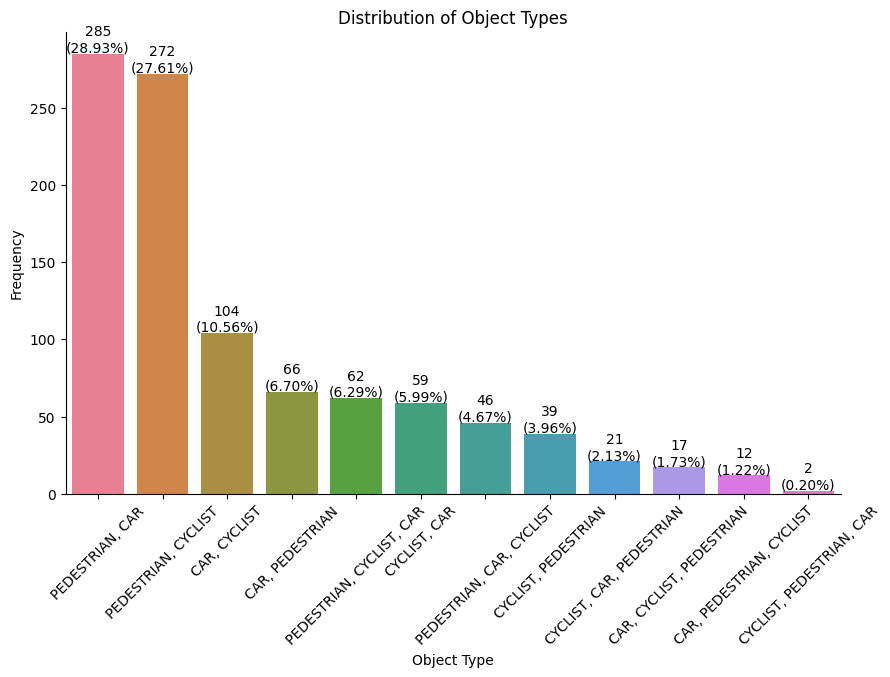

In [32]:
# Calculate counts and sort values by frequency in descending order
counts = lines_type_changes['unique_object_types'].value_counts().sort_values(ascending=False)

# Create a palette of different colors
palette = sns.color_palette("husl", len(counts))

# Plot the histogram with sorted values and different colors for each bin
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts.index, y=counts.values, palette=palette)

# Calculate the total number of observations
total = len(lines_type_changes)

# Annotate each bar with the count and percentage
for p, count in zip(ax.patches, counts):
    height = p.get_height()
    percentage = f'{height / total * 100:.2f}%'
    ax.annotate(f'{int(height)}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Remove the plot frame (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set title and labels
plt.title('Distribution of Object Types')
plt.xlabel('Object Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Most of the objects changed their type from pedestrian to a car and from pedestrian to cyclist (arounf 28% for both)


We were trying to explore, may be there will be some interesting situation for heading change or velocity change based for each of this groups. But based on the average parameter, couldnt find anything


In [33]:
 # Calculate average heading change per object
avg_heading_change = lines_type_changes.groupby('unique_object_types')['avg_heading_change'].mean()

 # Calculate average heading change per object
avg_v_change = lines_type_changes.groupby('unique_object_types')['avg_v_change'].mean()


print(avg_heading_change)
print(avg_v_change)

unique_object_types
CAR, CYCLIST               -0.121379
CAR, CYCLIST, PEDESTRIAN   -0.289290
CAR, PEDESTRIAN             1.940362
CAR, PEDESTRIAN, CYCLIST   -0.374118
CYCLIST, CAR                0.981525
CYCLIST, CAR, PEDESTRIAN    0.251706
CYCLIST, PEDESTRIAN        -0.368309
CYCLIST, PEDESTRIAN, CAR   -0.630435
PEDESTRIAN, CAR            -0.088528
PEDESTRIAN, CAR, CYCLIST   -0.495457
PEDESTRIAN, CYCLIST         0.125764
PEDESTRIAN, CYCLIST, CAR   -0.379689
Name: avg_heading_change, dtype: float64
unique_object_types
CAR, CYCLIST                0.010916
CAR, CYCLIST, PEDESTRIAN   -0.010641
CAR, PEDESTRIAN            -0.018787
CAR, PEDESTRIAN, CYCLIST    0.003939
CYCLIST, CAR               -0.010123
CYCLIST, CAR, PEDESTRIAN   -0.003026
CYCLIST, PEDESTRIAN         0.002024
CYCLIST, PEDESTRIAN, CAR   -0.033420
PEDESTRIAN, CAR             0.040450
PEDESTRIAN, CAR, CYCLIST    0.024540
PEDESTRIAN, CYCLIST         0.006920
PEDESTRIAN, CYCLIST, CAR    0.005258
Name: avg_v_change, dtype: floa

##### Additional Functions


We have created some aditional functions that will help us explore the data for different object types:

1. The function to create plots for different fieldsin a dataframe:


In [34]:
def plot_stats(df, x_field, y_field=None, z_field=None):
    # Create figure and axes for boxplot and histograms
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Boxplot
    if y_field and z_field:
        sns.boxplot(data=df[[x_field, y_field, z_field]], ax=axes[0], palette='Set3')
        axes[0].set_title('Boxplot')
        axes[0].set_xlabel('Variables')
        axes[0].set_ylabel('Values')
    elif y_field:
        sns.boxplot(data=df[[x_field, y_field]], ax=axes[0], palette='Set3')
        axes[0].set_title('Boxplot')
        axes[0].set_xlabel('Variables')
        axes[0].set_ylabel('Values')
    else:
        sns.boxplot(data=df[[x_field]], ax=axes[0], palette='Set3')
        axes[0].set_title('Boxplot')
        axes[0].set_xlabel('Variables')
        axes[0].set_ylabel('Values')
    
    # Histogram for x_field
    sns.histplot(data=df, x=x_field, bins=10, kde=True, color='skyblue', ax=axes[1])
    axes[1].set_title(f'Histogram of {x_field}')
    axes[1].set_xlabel(f'{x_field}')
    axes[1].set_ylabel('Frequency')
    
    # Histogram for y_field (if provided)
    if y_field:
        sns.histplot(data=df, x=y_field, bins=10, kde=True, color='lightgreen', ax=axes[2])
        axes[2].set_title(f'Histogram of {y_field}')
        axes[2].set_xlabel(f'{y_field}')
        axes[2].set_ylabel('Frequency')
    elif z_field:
        sns.histplot(data=df, x=z_field, bins=10, kde=True, color='lightgreen', ax=axes[2])
        axes[2].set_title(f'Histogram of {z_field}')
        axes[2].set_xlabel(f'{z_field}')
        axes[2].set_ylabel('Frequency')
    else:
        axes[2].axis('off')  # Hide the third subplot if both y_field and z_field are not provided
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plots
    plt.show()
    
    # Calculate statistics for x_field, y_field, and z_field (if provided)
    stats_x = df[x_field].describe()
    print(f"\nStatistics for {x_field}:")
    print(stats_x)
    
    if y_field:
        stats_y = df[y_field].describe()
        print(f"\nStatistics for {y_field}:")
        print(stats_y)
    
    if z_field:
        stats_z = df[z_field].describe()
        print(f"\nStatistics for {z_field}:")
        print(stats_z)



2. The function to create a set of plots for specific fields in a dataframe:


In [35]:
def analyze_dataset(dataset):

    # 1: Plots and statistics for object dimention characteristics (width, length, height)
    plot_stats(dataset, 'avg_width', 'avg_length', 'avg_height')

    # 2: Plots and statistics for object route_length and distance between first and last point
    plot_stats(dataset, 'route_length', 'distance_first_last')

    # 3: Plots and statistics for ratio between route length and distance between first and last point
    plot_stats(dataset, 'direct_real_d_ratio')

    # 4: Plots and statistics for total time
    plot_stats(dataset, 'total_time')

    # 5: Plots and statistics for average velocity
    plot_stats(dataset, 'avg_v')



#### 1. Cars


In [36]:
lines_gdf_cars = lines_gdf_stat[lines_gdf_stat['object_type'] =='CAR']
lines_gdf_cars.head()

,object_id,total_time,avg_heading,avg_v,avg_width,avg_length,avg_height,object_type,time_class,avg_heading_change,...,PEDESTRIAN,top_object_type_percentage,route_length,total_time_s,direct_real_d_ratio,geometry,unique_object_types_sorted,typeChanges,typeChangesRate,bins
0,152997118,286302,133.7800,0.03,1.869,4.387,1.151,CAR,0,0.065886,...,0,100.0,102.985753,286.302,623.585910,"LINESTRING (13.06440 47.81014, 13.06441 47.810...",CAR,0,0.0,NaN
2,152997182,270701,139.9335,0.02,1.912,4.523,1.690,CAR,0,-0.068684,...,0,100.0,60.296137,270.701,698.199732,"LINESTRING (13.06413 47.81005, 13.06413 47.810...",CAR,0,0.0,NaN
3,152997183,101799,105.4660,0.01,1.872,4.867,1.566,CAR,0,-0.081633,...,0,100.0,144.550702,101.799,1.208331,"LINESTRING (13.06339 47.80977, 13.06339 47.809...",CAR,0,0.0,NaN
4,152997184,100897,97.4585,0.01,1.974,5.000,1.615,CAR,0,-0.053851,...,0,100.0,144.484505,100.897,1.299410,"LINESTRING (13.06339 47.80978, 13.06340 47.809...",CAR,0,0.0,NaN
7,152997753,109398,34.2955,0.04,2.227,5.777,2.422,CAR,0,0.225113,...,0,100.0,153.183233,109.398,2.013326,"LINESTRING (13.06394 47.80935, 13.06394 47.809...",CAR,0,0.0,NaN


##### СARS DIMENTIONS (width and height, length)


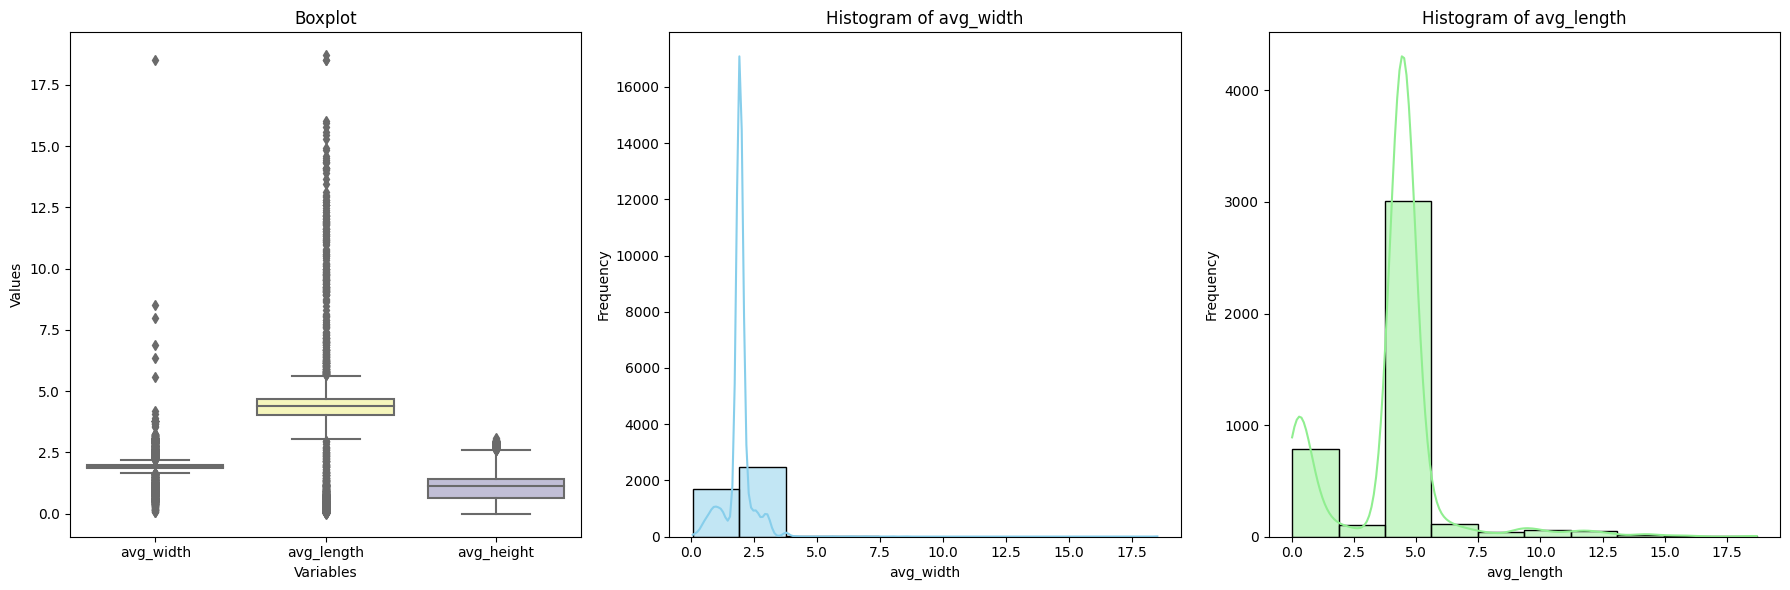


Statistics for avg_width:
count    4178.000000
mean        1.899717
std         0.577520
min         0.054000
25%         1.854250
50%         1.923500
75%         1.989000
max        18.495000
Name: avg_width, dtype: float64

Statistics for avg_length:
count    4178.000000
mean        4.008679
std         2.248963
min         0.009000
25%         4.023000
50%         4.395000
75%         4.664000
max        18.706000
Name: avg_length, dtype: float64

Statistics for avg_height:
count    4178.000000
mean        1.136760
std         0.694165
min         0.004000
25%         0.636625
50%         1.145000
75%         1.425000
max         3.071000
Name: avg_height, dtype: float64


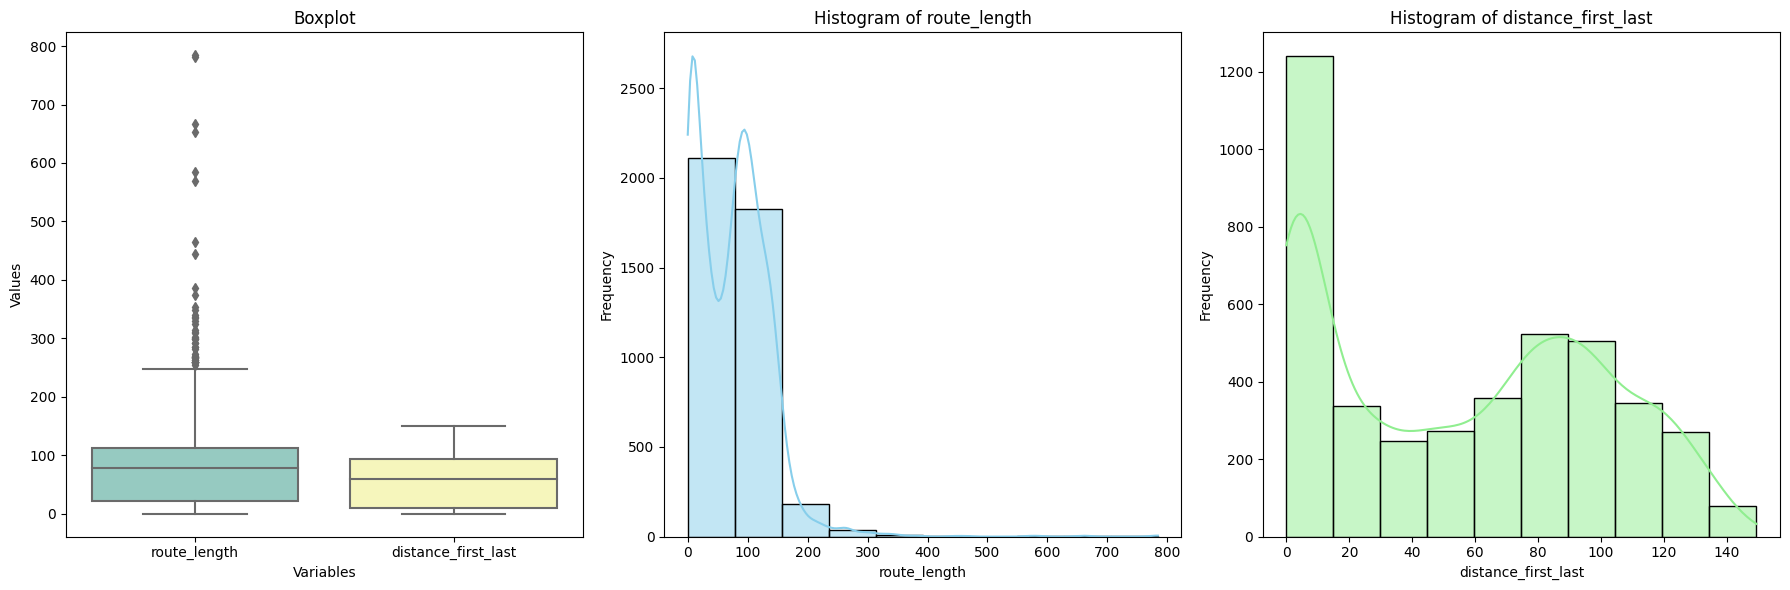


Statistics for route_length:
count    4178.000000
mean       75.322052
std        61.633961
min         0.000000
25%        21.538840
50%        77.358236
75%       112.704000
max       784.263218
Name: route_length, dtype: float64

Statistics for distance_first_last:
count    4178.000000
mean       56.380821
std        43.919954
min         0.000000
25%         9.259288
50%        58.883808
75%        93.647267
max       149.418347
Name: distance_first_last, dtype: float64


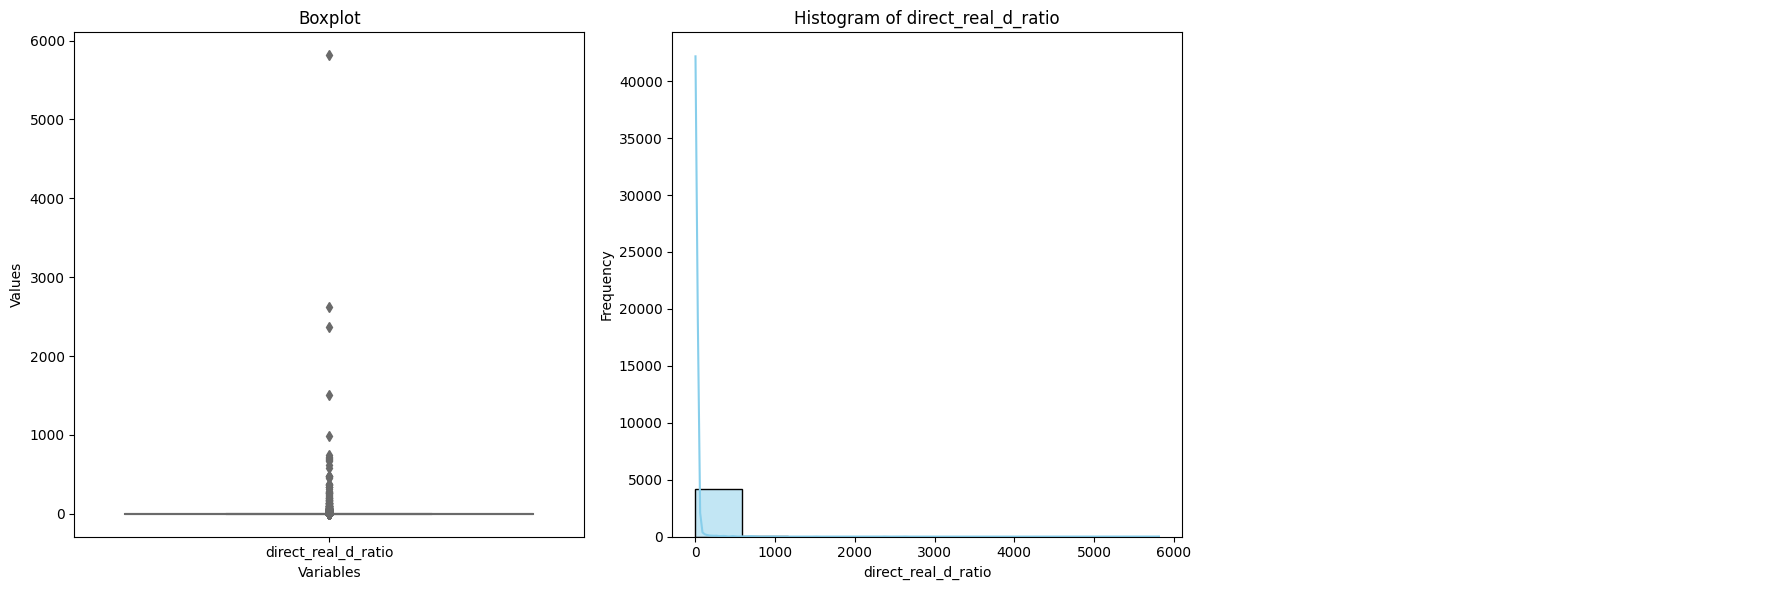


Statistics for direct_real_d_ratio:
count    4176.000000
mean             inf
std              NaN
min         1.000000
25%         1.055816
50%         1.156346
75%         1.455117
max              inf
Name: direct_real_d_ratio, dtype: float64


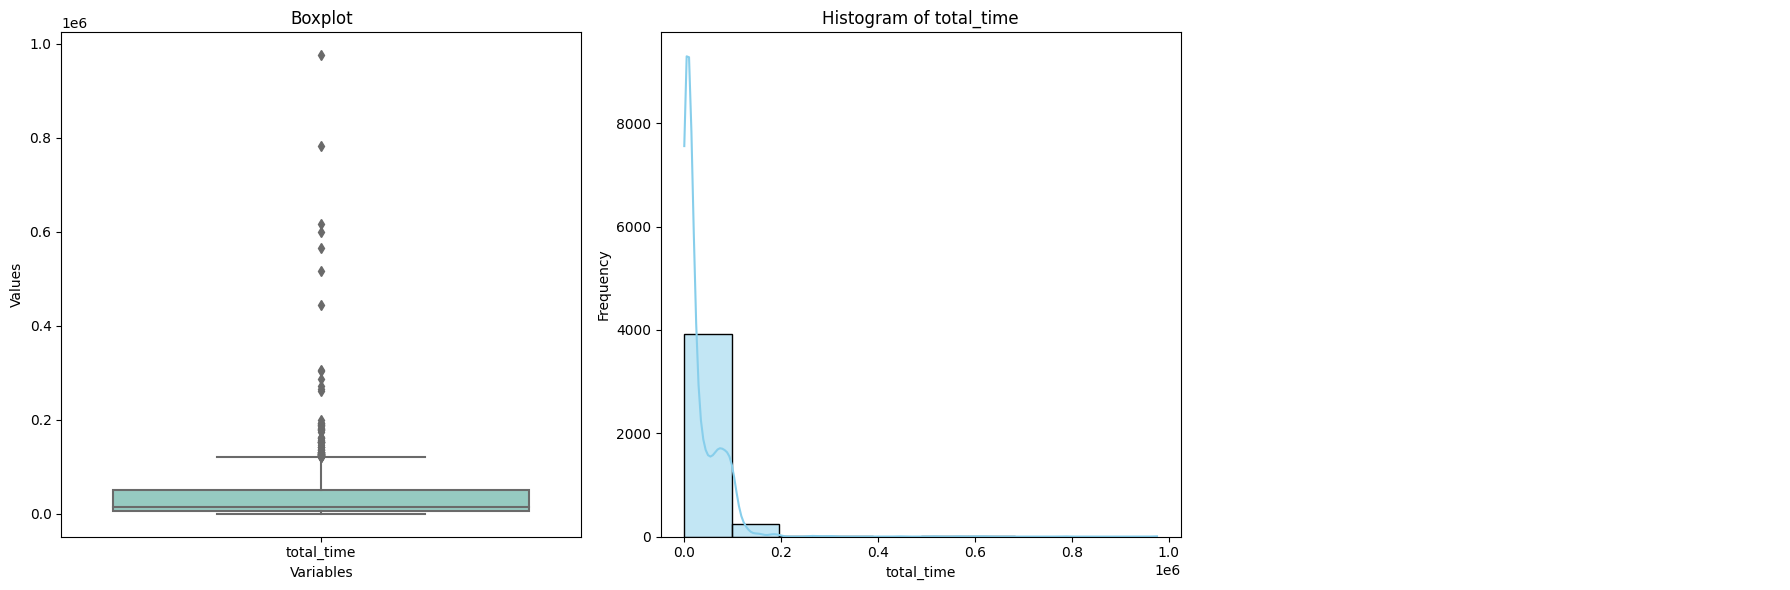


Statistics for total_time:
count      4178.000000
mean      31888.159167
std       44217.103261
min          91.000000
25%        5098.500000
50%       14200.000000
75%       51098.000000
max      975498.000000
Name: total_time, dtype: float64


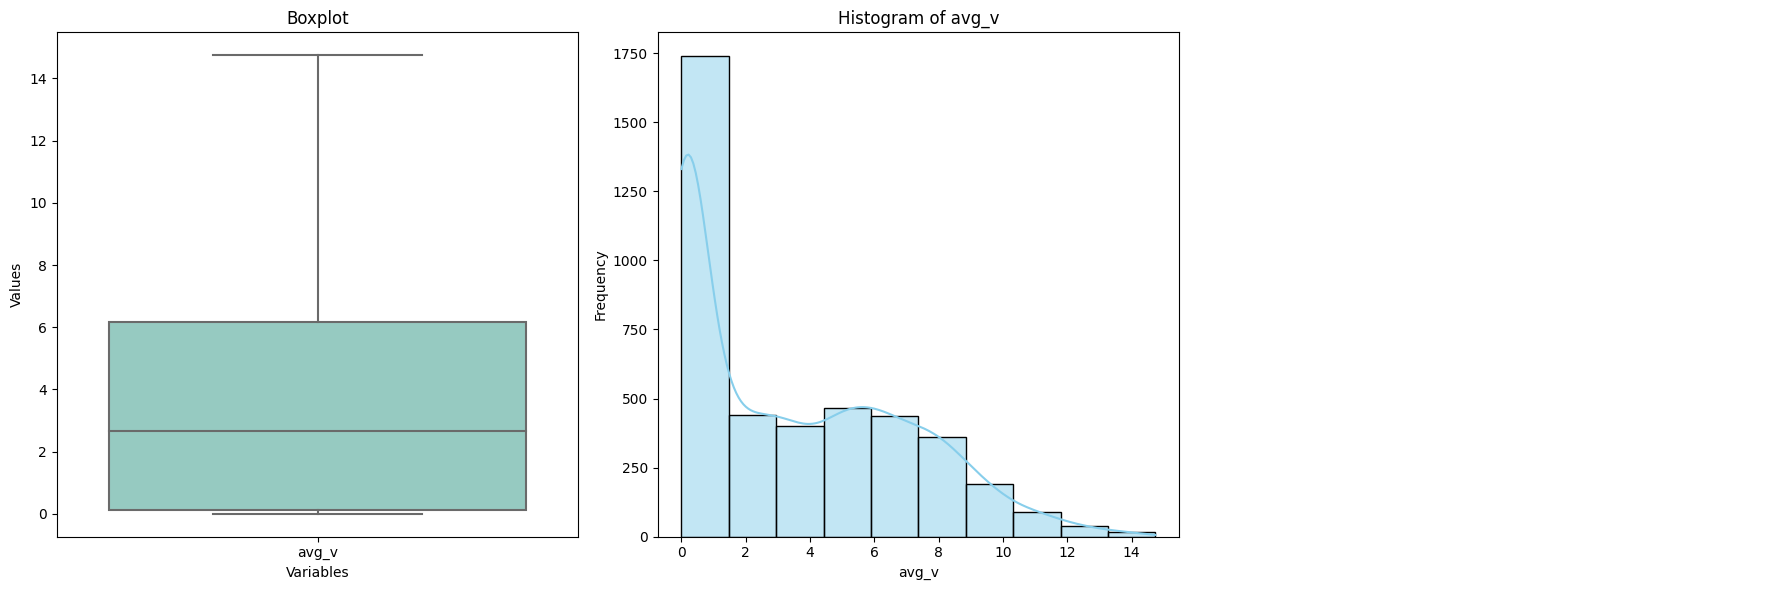


Statistics for avg_v:
count    4178.000000
mean        3.500172
std         3.425574
min         0.000000
25%         0.120000
50%         2.662500
75%         6.160000
max        14.745000
Name: avg_v, dtype: float64


In [37]:
analyze_dataset(lines_gdf_cars)

Based on this cahracteristics we can distinguish statistical outliers and use it as a data quality metrics


In [38]:
def detect_outliers(df, columns):
    # Create a copy of the DataFrame to avoid modifying the original
    df_outliers = df.copy()
    
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df_outliers[col].quantile(0.25)
        Q3 = df_outliers[col].quantile(0.75)
        
        # Calculate IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Determine outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create a new field indicating outliers
        outlier_field = f"{col}_outlier"
        df_outliers[outlier_field] = ((df_outliers[col] < lower_bound) | (df_outliers[col] > upper_bound)).astype(int)
        
    # Calculate the sum of outliers for each row
    outlier_columns = [f"{col}_outlier" for col in columns]
    df_outliers['total_outliers'] = df_outliers[outlier_columns].sum(axis=1)
    
    return df_outliers


In [39]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
cars_outliers = detect_outliers(lines_gdf_cars, columns_to_check)
cars_outliers.head()

,object_id,total_time,avg_heading,avg_v,avg_width,avg_length,avg_height,object_type,time_class,avg_heading_change,...,typeChangesRate,bins,total_time_outlier,avg_v_outlier,avg_width_outlier,avg_height_outlier,avg_length_outlier,route_length_outlier,distance_first_last_outlier,total_outliers
0,152997118,286302,133.7800,0.03,1.869,4.387,1.151,CAR,0,0.065886,...,0.0,NaN,1,0,0,0,0,0,0,1
2,152997182,270701,139.9335,0.02,1.912,4.523,1.690,CAR,0,-0.068684,...,0.0,NaN,1,0,0,0,0,0,0,1
3,152997183,101799,105.4660,0.01,1.872,4.867,1.566,CAR,0,-0.081633,...,0.0,NaN,0,0,0,0,0,0,0,0
4,152997184,100897,97.4585,0.01,1.974,5.000,1.615,CAR,0,-0.053851,...,0.0,NaN,0,0,0,0,0,0,0,0
7,152997753,109398,34.2955,0.04,2.227,5.777,2.422,CAR,0,0.225113,...,0.0,NaN,0,0,1,0,1,0,0,2


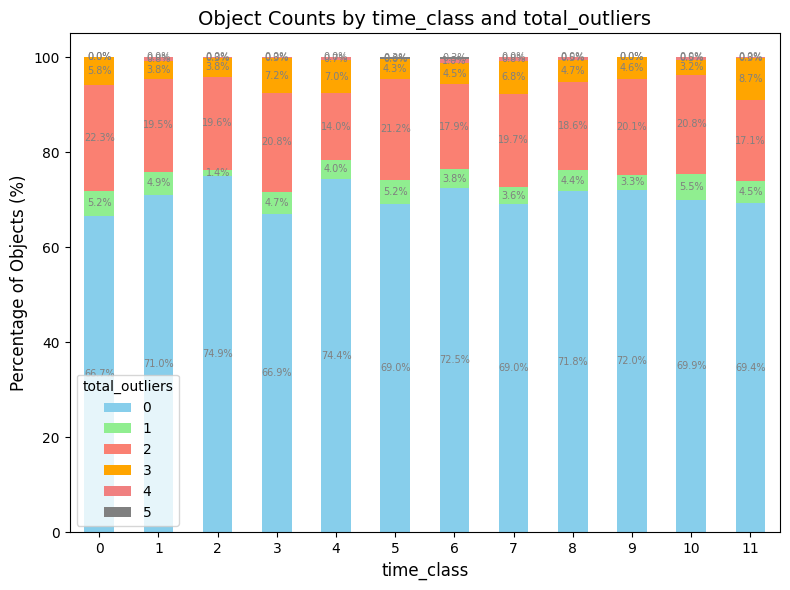

In [40]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = cars_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'gray']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 2. Pedestrians


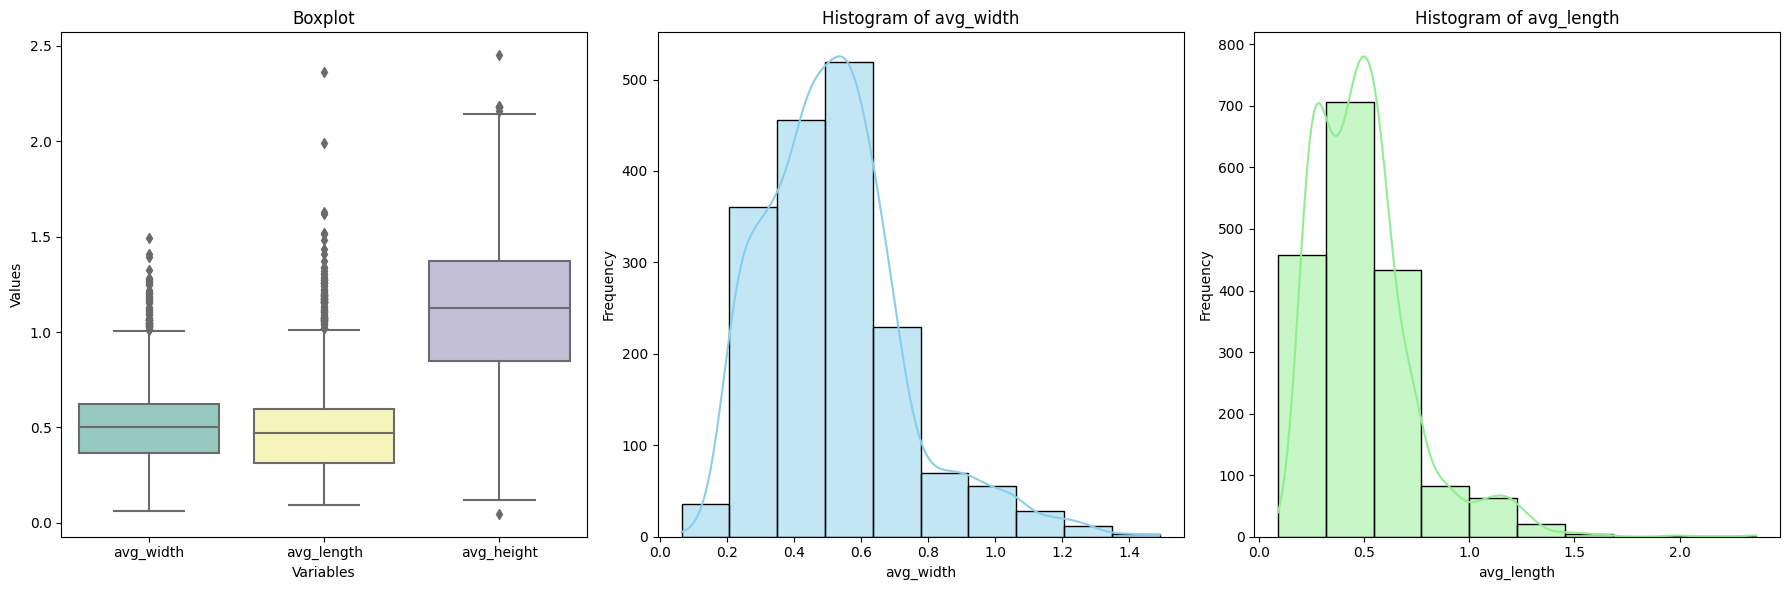


Statistics for avg_width:
count    1769.000000
mean        0.517953
std         0.210210
min         0.064000
25%         0.368000
50%         0.503500
75%         0.624000
max         1.491000
Name: avg_width, dtype: float64

Statistics for avg_length:
count    1769.000000
mean        0.499413
std         0.242799
min         0.092000
25%         0.315000
50%         0.470000
75%         0.595000
max         2.364000
Name: avg_length, dtype: float64

Statistics for avg_height:
count    1769.000000
mean        1.109840
std         0.360861
min         0.048500
25%         0.849000
50%         1.123500
75%         1.372500
max         2.450000
Name: avg_height, dtype: float64


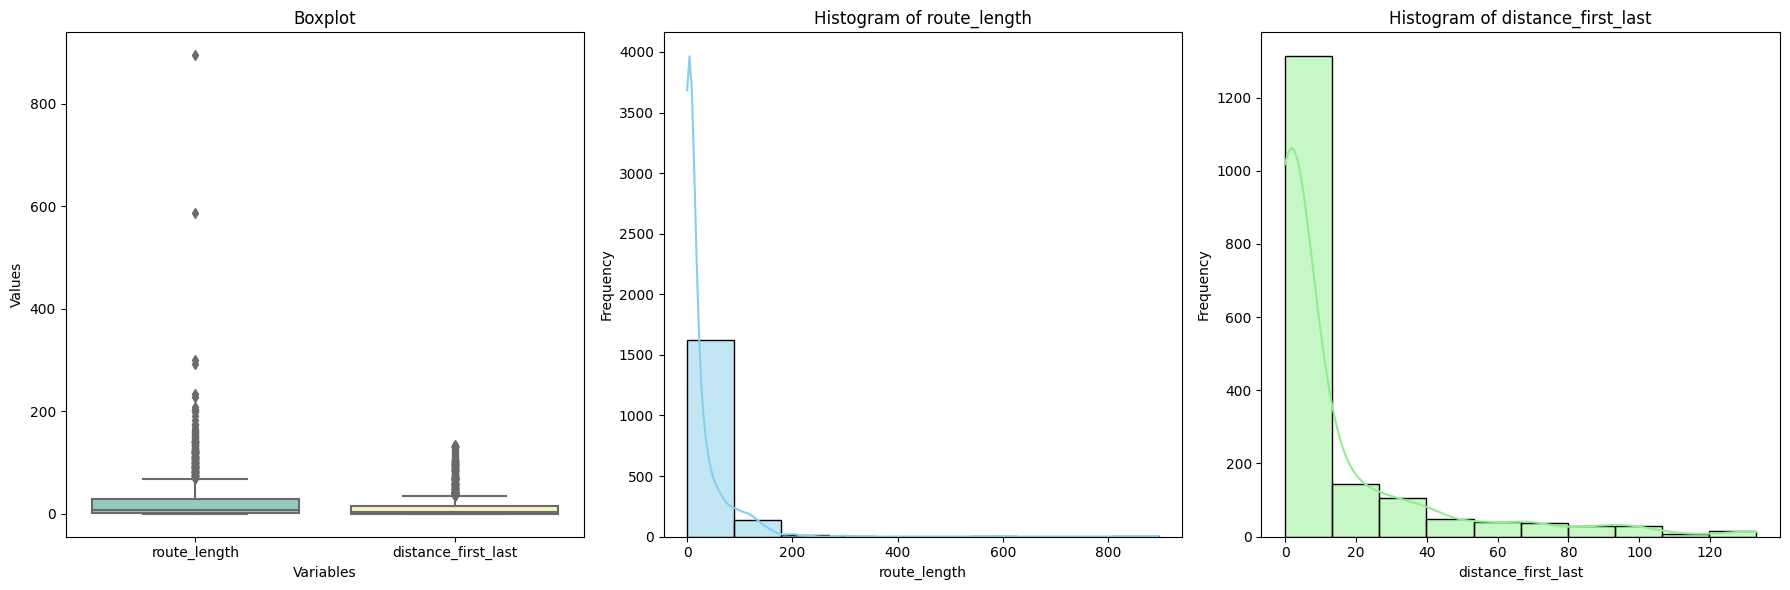


Statistics for route_length:
count    1769.000000
mean       24.235552
std        44.936549
min         0.000000
25%         1.203799
50%         6.902049
75%        28.358431
max       895.087643
Name: route_length, dtype: float64

Statistics for distance_first_last:
count    1769.000000
mean       14.300289
std        25.493666
min         0.000000
25%         0.245034
50%         2.382743
75%        14.300744
max       133.101487
Name: distance_first_last, dtype: float64


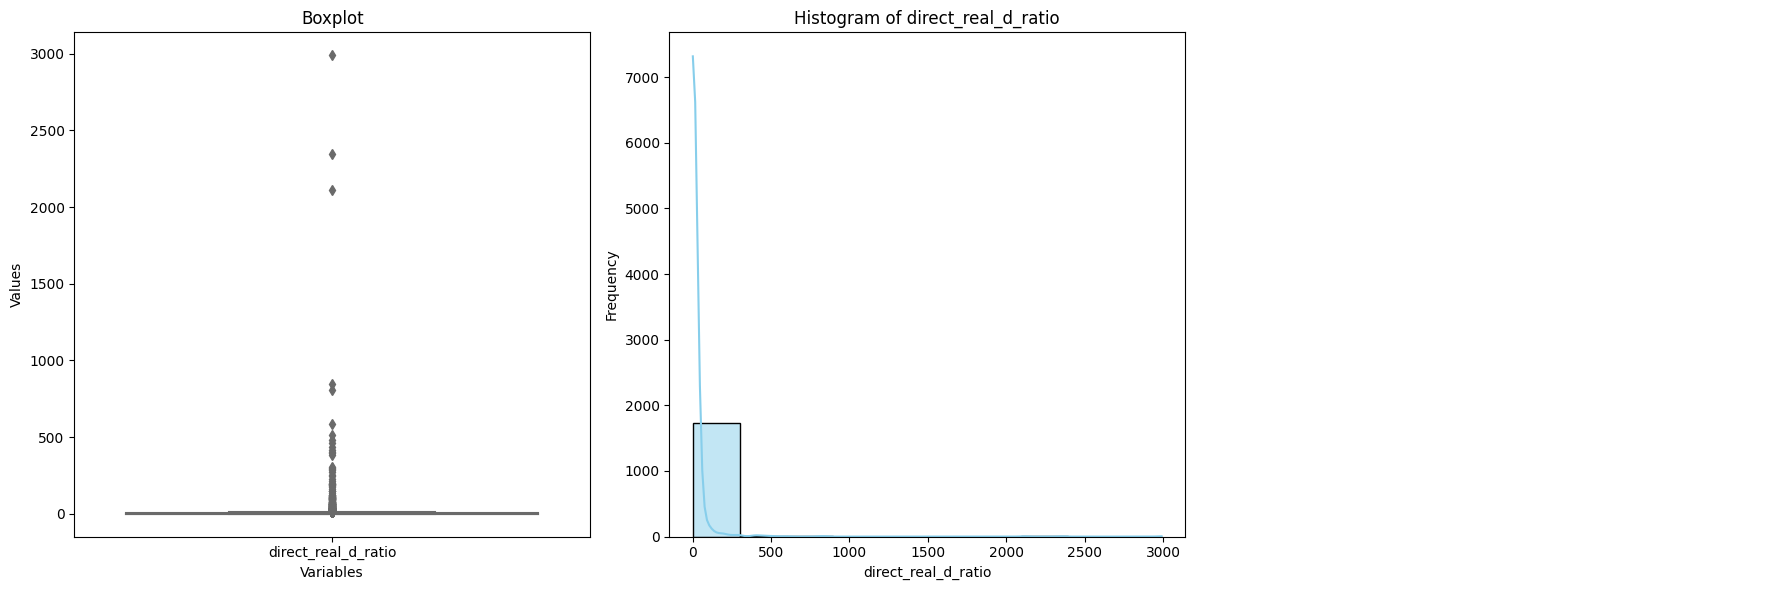


Statistics for direct_real_d_ratio:
count    1760.000000
mean             inf
std              NaN
min         1.000000
25%         1.092678
50%         1.405990
75%         4.543949
max              inf
Name: direct_real_d_ratio, dtype: float64


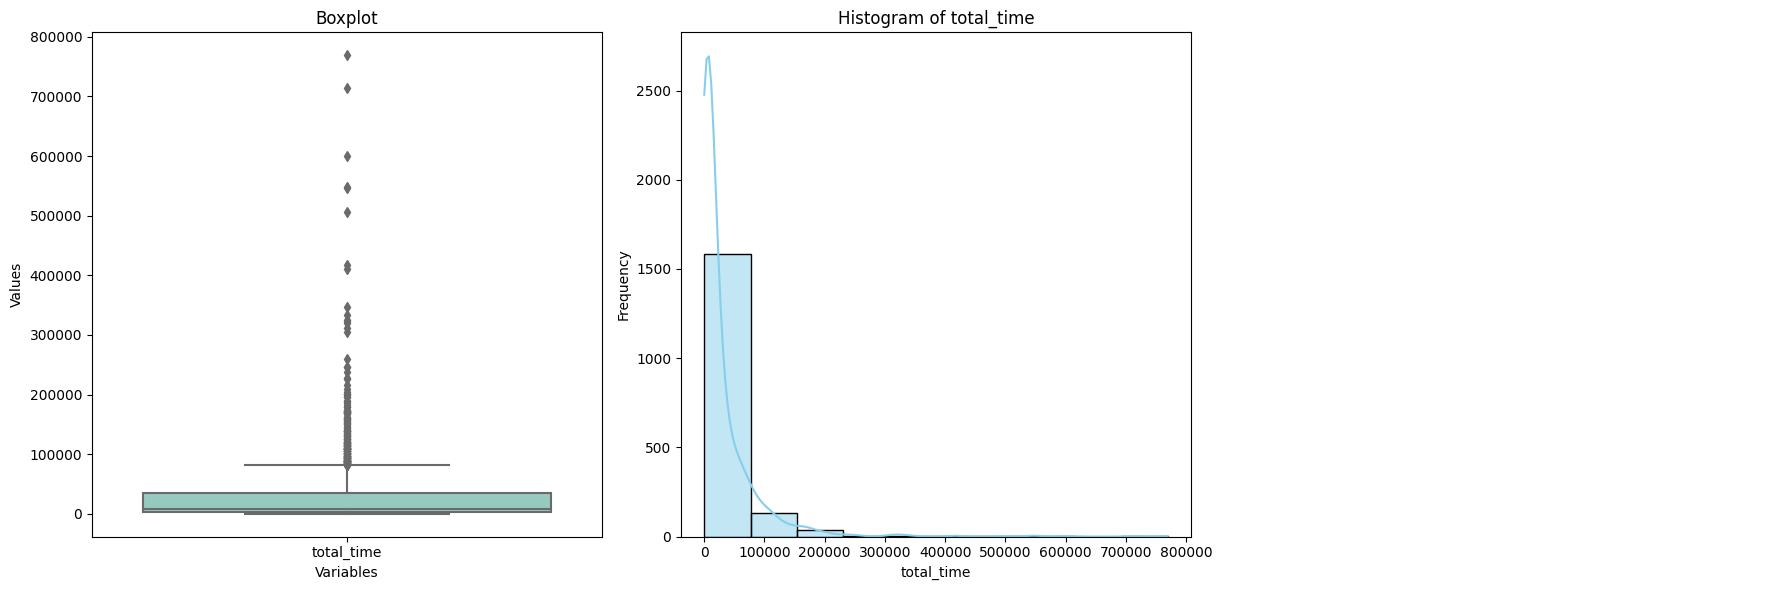


Statistics for total_time:
count      1769.000000
mean      29624.931034
std       56806.996871
min          93.000000
25%        2400.000000
50%        8596.000000
75%       33999.000000
max      769198.000000
Name: total_time, dtype: float64


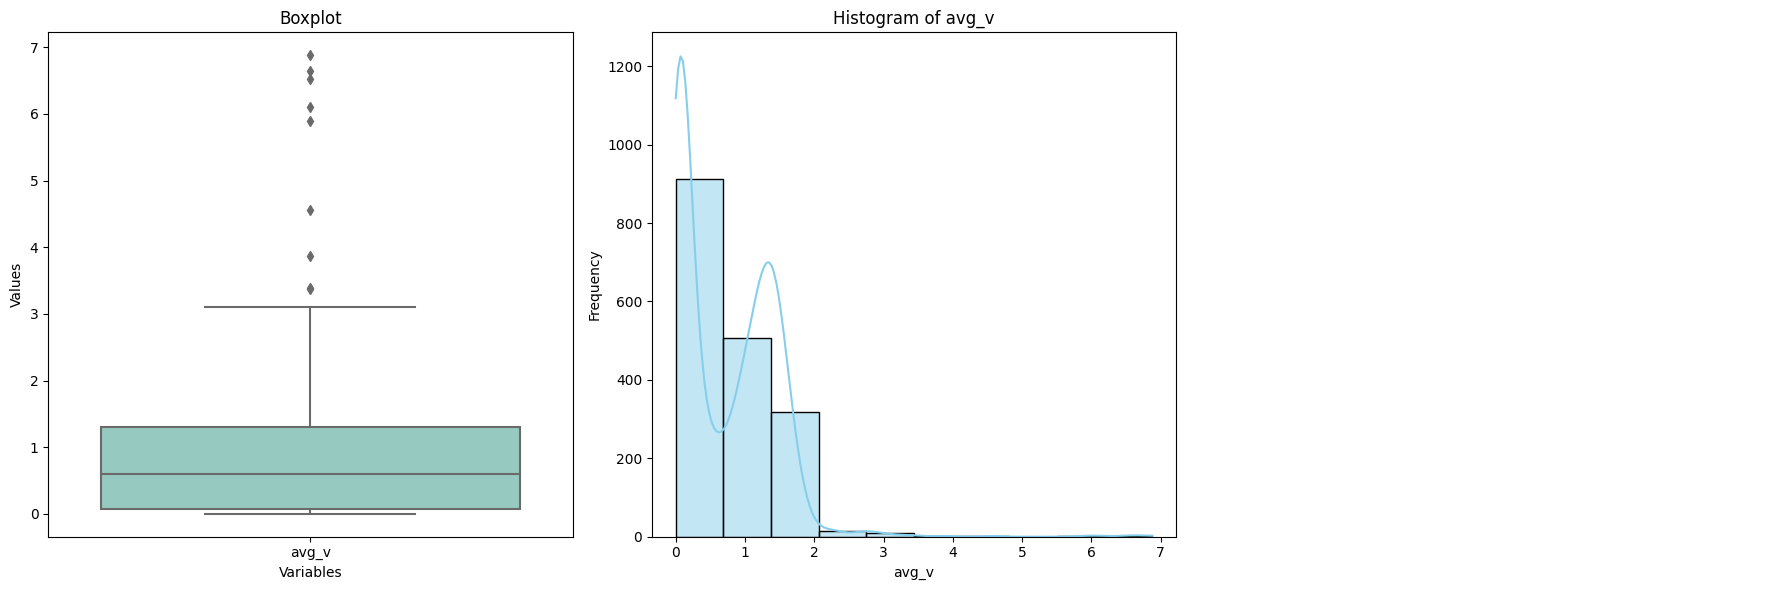


Statistics for avg_v:
count    1769.000000
mean        0.726439
std         0.721659
min         0.000000
25%         0.070000
50%         0.600000
75%         1.300000
max         6.880000
Name: avg_v, dtype: float64


In [41]:
lines_gdf_pedestrians = lines_gdf_stat[lines_gdf_stat['object_type'] =='PEDESTRIAN']
analyze_dataset(lines_gdf_pedestrians)

In [42]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
pedestrians_outliers = detect_outliers(lines_gdf_pedestrians, columns_to_check)
pedestrians_outliers.head()

,object_id,total_time,avg_heading,avg_v,avg_width,avg_length,avg_height,object_type,time_class,avg_heading_change,...,typeChangesRate,bins,total_time_outlier,avg_v_outlier,avg_width_outlier,avg_height_outlier,avg_length_outlier,route_length_outlier,distance_first_last_outlier,total_outliers
1,152997181,138700,148.052,0.770,0.559,0.5585,1.3320,PEDESTRIAN,0,-0.048435,...,0.0,NaN,1,0,0,0,0,1,1,3
5,152997343,108398,228.052,0.100,0.659,0.6375,1.0935,PEDESTRIAN,0,-0.075645,...,0.1,95-100%,1,0,0,0,0,0,0,1
6,152997466,115007,233.052,0.070,0.459,0.5000,1.4510,PEDESTRIAN,0,-0.175439,...,0.1,95-100%,1,0,0,0,0,1,1,3
8,152997836,109009,134.466,0.020,0.574,0.6820,1.2320,PEDESTRIAN,0,-0.089454,...,0.1,95-100%,1,0,0,0,0,1,1,3
9,152997959,116001,223.052,0.585,0.448,0.3850,1.1940,PEDESTRIAN,0,0.288462,...,0.0,NaN,1,0,0,0,0,1,0,2


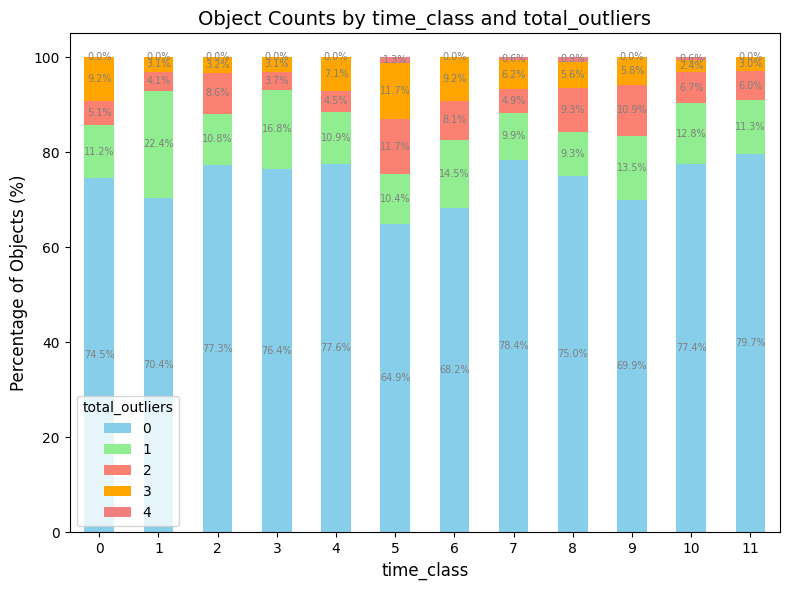

In [43]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = pedestrians_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 3. Two-Wheelers


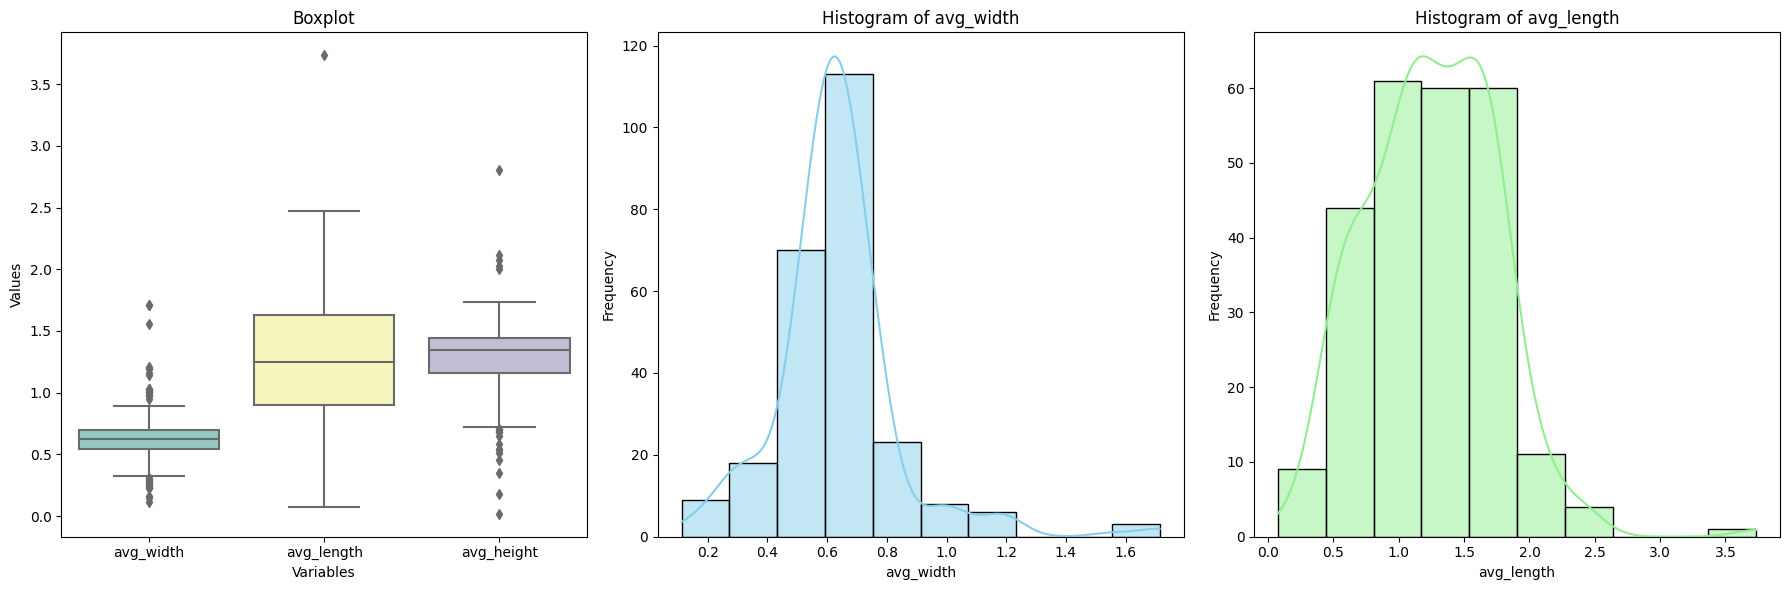


Statistics for avg_width:
count    250.000000
mean       0.632556
std        0.207776
min        0.112500
25%        0.541625
50%        0.623000
75%        0.697250
max        1.714000
Name: avg_width, dtype: float64

Statistics for avg_length:
count    250.000000
mean       1.252888
std        0.498308
min        0.076000
25%        0.898750
50%        1.250000
75%        1.629125
max        3.735000
Name: avg_length, dtype: float64

Statistics for avg_height:
count    250.000000
mean       1.285610
std        0.310616
min        0.019000
25%        1.155250
50%        1.344250
75%        1.445750
max        2.803000
Name: avg_height, dtype: float64


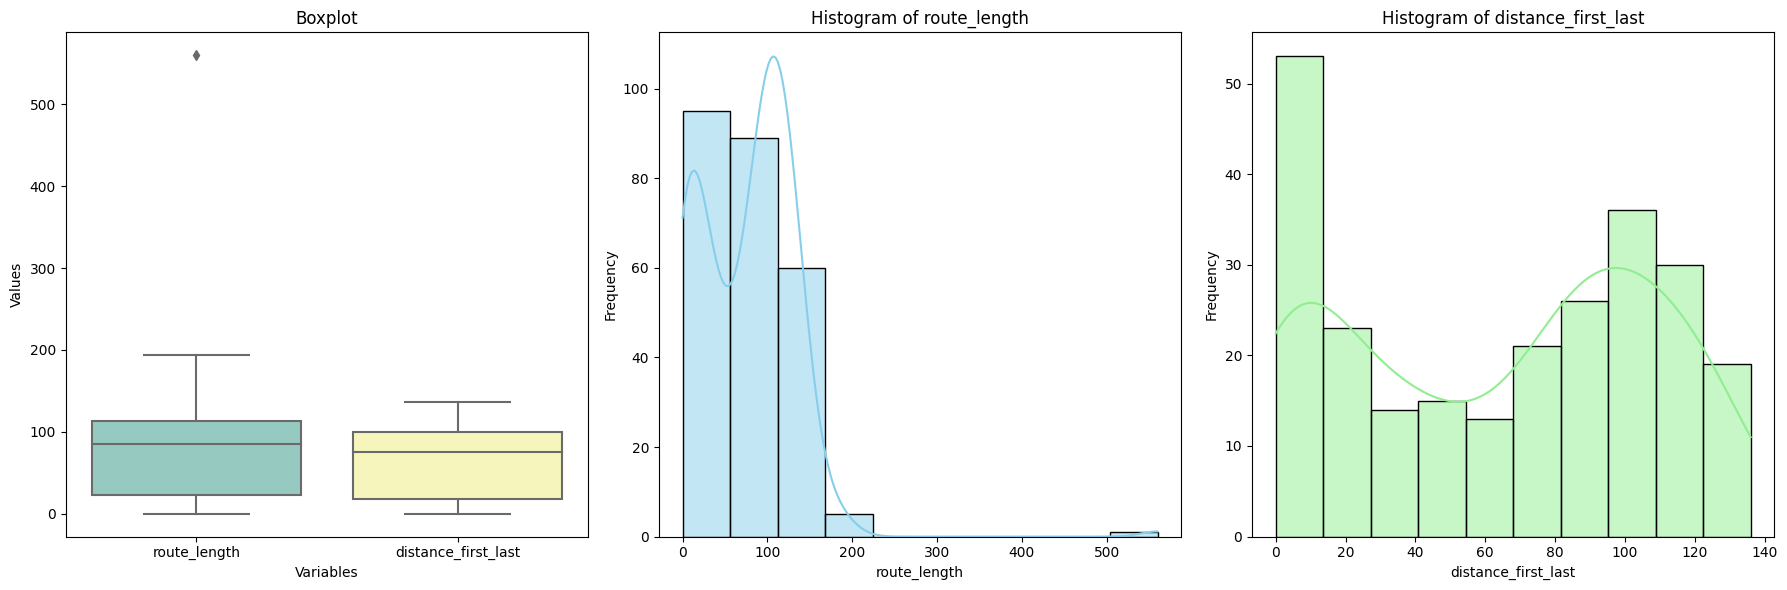


Statistics for route_length:
count    250.000000
mean      76.275553
std       58.753900
min        0.022234
25%       22.881110
50%       84.569250
75%      113.700210
max      559.920694
Name: route_length, dtype: float64

Statistics for distance_first_last:
count    250.000000
mean      63.831372
std       43.892981
min        0.000000
25%       18.486127
50%       75.049915
75%       99.808464
max      135.982695
Name: distance_first_last, dtype: float64


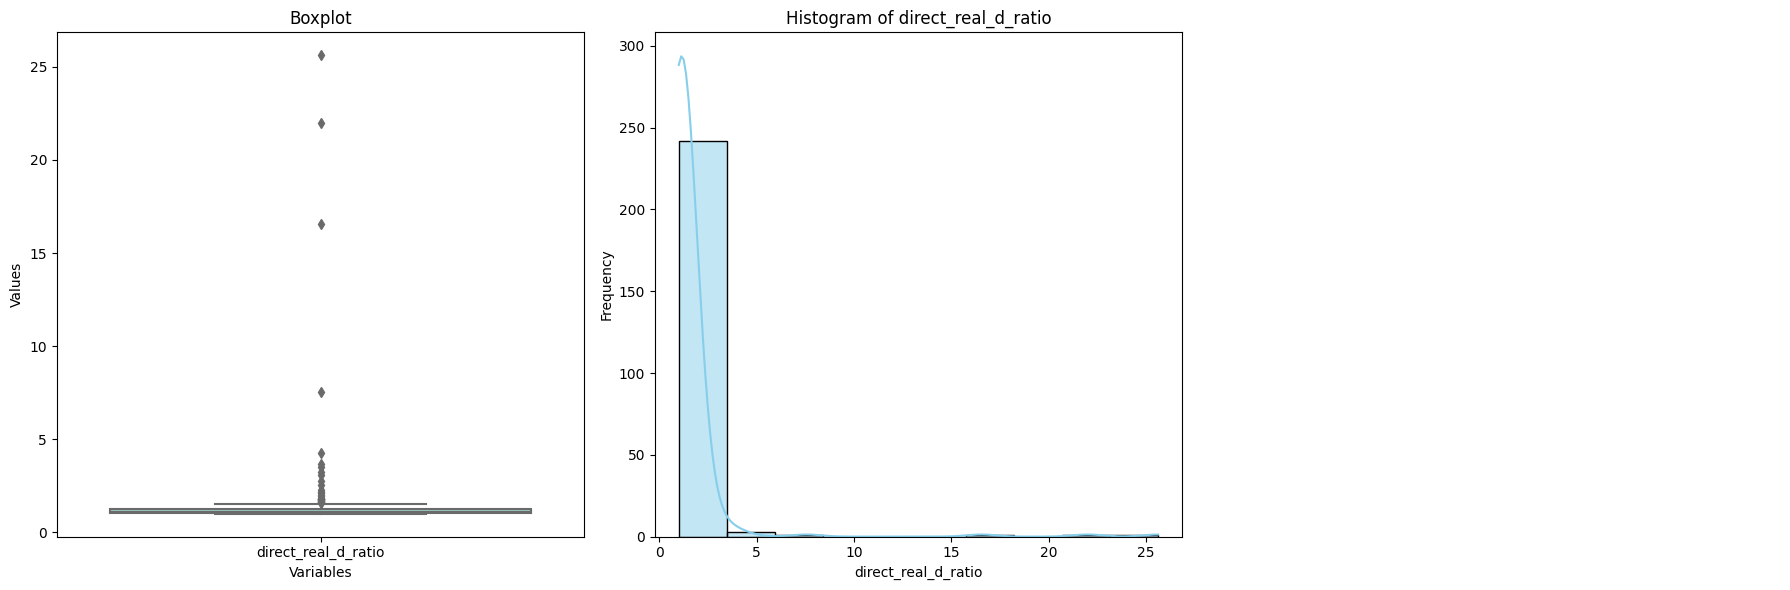


Statistics for direct_real_d_ratio:
count    250.000000
mean            inf
std             NaN
min        1.000000
25%        1.026796
50%        1.087646
75%        1.246673
max             inf
Name: direct_real_d_ratio, dtype: float64


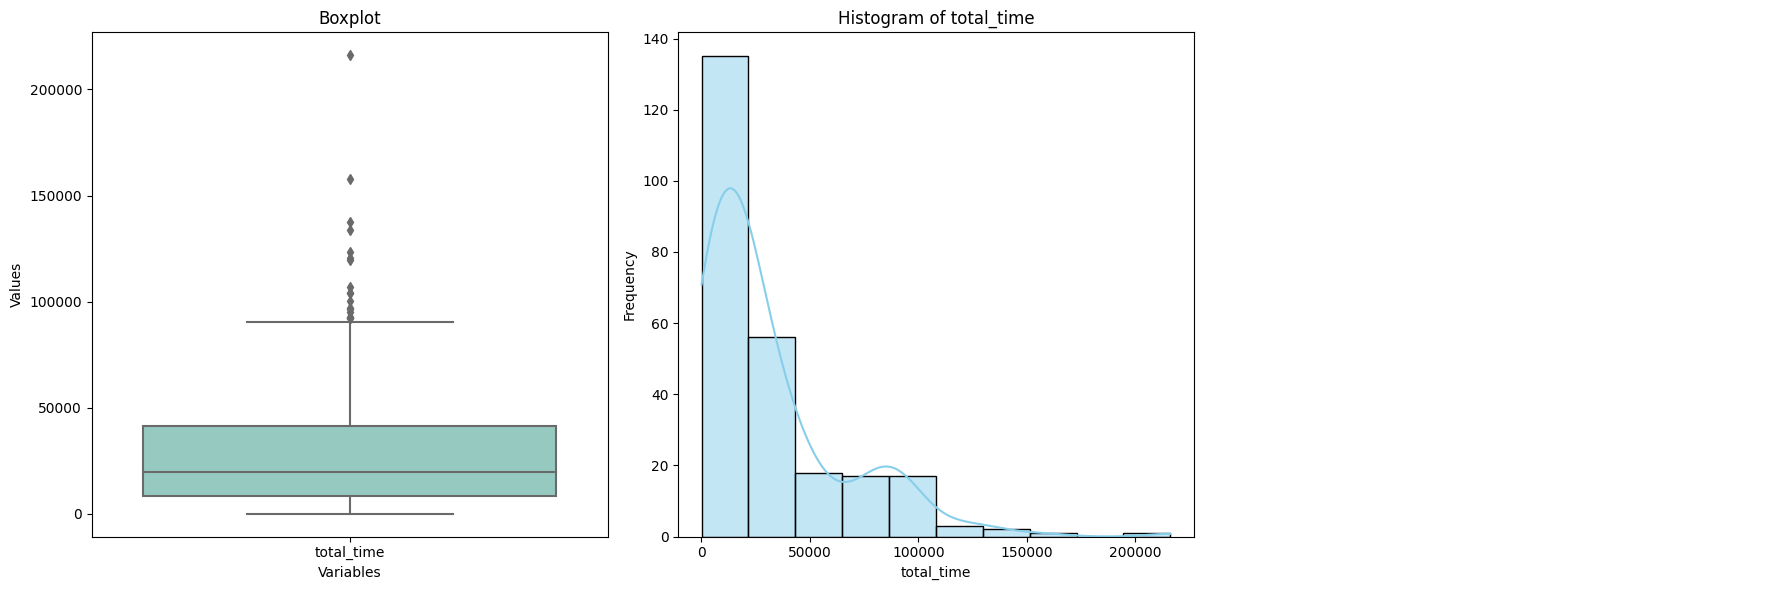


Statistics for total_time:
count       250.000000
mean      31482.288000
std       33844.385272
min          94.000000
25%        8623.250000
50%       19600.000000
75%       41577.000000
max      216099.000000
Name: total_time, dtype: float64


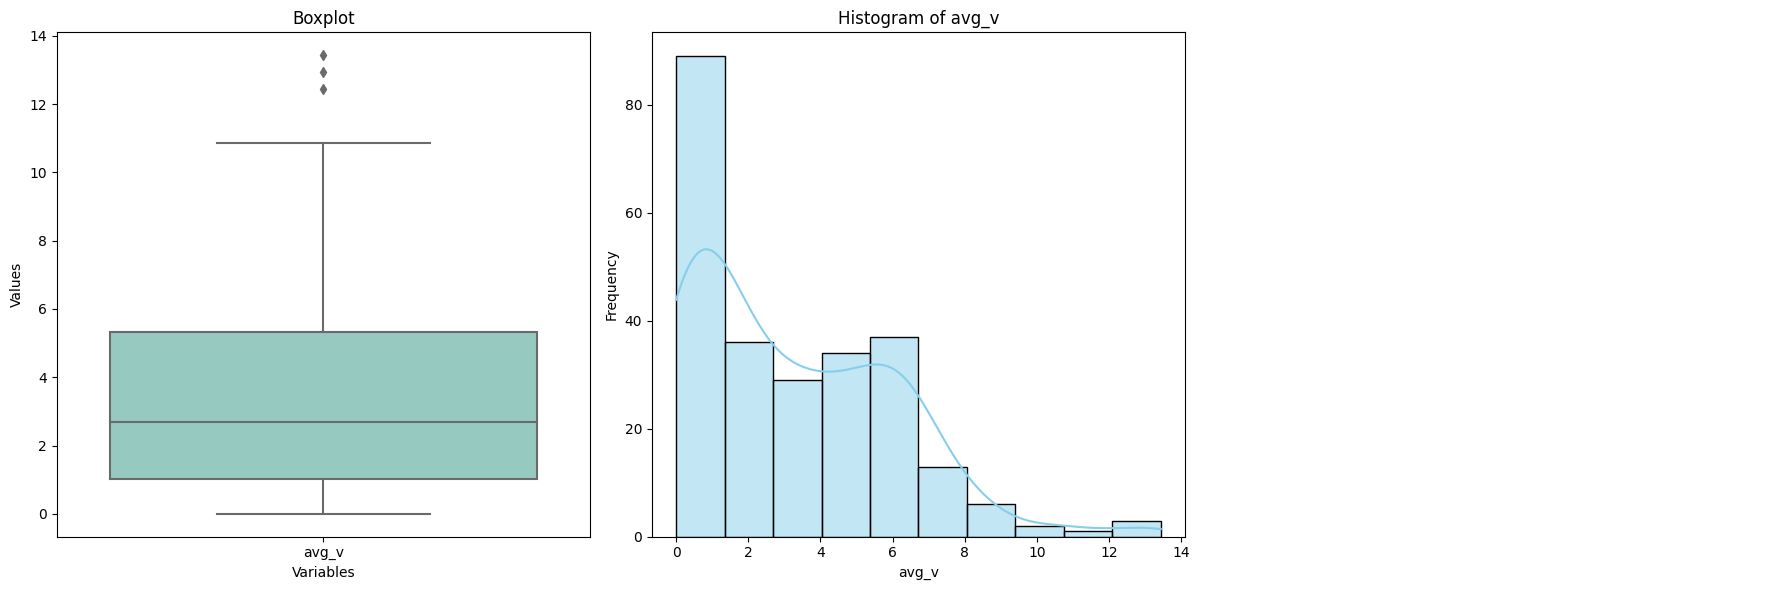


Statistics for avg_v:
count    250.000000
mean       3.245340
std        2.823628
min        0.000000
25%        1.022500
50%        2.695000
75%        5.335000
max       13.430000
Name: avg_v, dtype: float64


In [44]:
lines_gdf_two_wheelers = lines_gdf_stat[lines_gdf_stat['object_type'] =='CYCLIST']
analyze_dataset(lines_gdf_two_wheelers)

In [45]:
columns_to_check = ['total_time', 'avg_v', 'avg_width', 'avg_height', 'avg_length', 'route_length', 'distance_first_last']
two_wheelers_outliers = detect_outliers(lines_gdf_two_wheelers, columns_to_check)


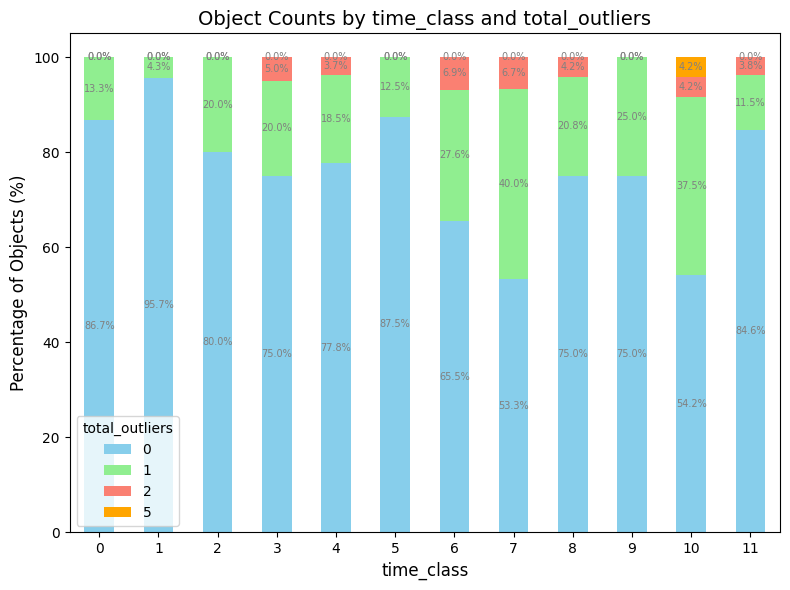

In [46]:
# Calculate the counts and percentages of each combination of time_class and total_outliers
counts = two_wheelers_outliers.groupby(['time_class', 'total_outliers']).size().reset_index(name='count')
total_counts = counts.groupby('time_class')['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100

# Pivot the data to prepare for plotting
pivot_counts = counts.pivot(index='time_class', columns='total_outliers', values='percentage').fillna(0)

# Plotting
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral']  # Define additional colors
ax = pivot_counts.plot(kind='bar', stacked=True, color=colors, figsize=(8, 6))

# Add labels and title
ax.set_title('Object Counts by time_class and total_outliers', fontsize=14)
ax.set_xlabel('time_class', fontsize=12)
ax.set_ylabel('Percentage of Objects (%)', fontsize=12)

ax.legend(title='total_outliers', fontsize=10)

# Show percentages inside each bar segment
for i in range(pivot_counts.shape[0]):
    total = pivot_counts.iloc[i].sum()
    cum_sum = 0
    for j in range(pivot_counts.shape[1]):
        value = pivot_counts.iloc[i, j]
        ax.text(i, cum_sum + value / 2, f'{value:.1f}%', ha='center', va='center', color='gray', fontsize=7)
        cum_sum += value

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()